<a href="https://colab.research.google.com/github/shinjeongdong/MLDeeplearningStudy/blob/main/%5BPyTorch%5D/%5BPyTorch%5D_5_1_%EB%8B%A4%EC%A4%91_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [ ]:
DEVICE = "cuda" if torch.cuda.is_available() else 'cpu'
print(DEVICE)

cuda


# train_DS와 test_DS 구경

In [ ]:
transform = transforms.ToTensor()
train_DS = datasets.MNIST(root = "/content/drive/MyDrive/Colab Notebooks", train=True, download= True, transform=transform)
test_DS = datasets.MNIST(root = "/content/drive/MyDrive/Colab Notebooks", train=False, download= True, transform=transform)

In [ ]:
print(train_DS) # 학습 데이터 셋
print(test_DS) # 테스트 데이터 셋
print(len(train_DS))
print(len(test_DS))


Dataset MNIST
    Number of datapoints: 60000
    Root location: /content/drive/MyDrive/Colab Notebooks
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: /content/drive/MyDrive/Colab Notebooks
    Split: Test
    StandardTransform
Transform: ToTensor()
60000
10000


In [ ]:
train_DS.class_to_idx #인덱스

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [ ]:
train_DS.data.shape # 60000,28,28 28행 28열 행렬이 60000개 있다는뜻
#28 x 28 = MNIST 데이터셋의 해상도 크기

torch.Size([60000, 28, 28])

In [ ]:
train_DS.data[0] # 0번째 28x28 출력

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

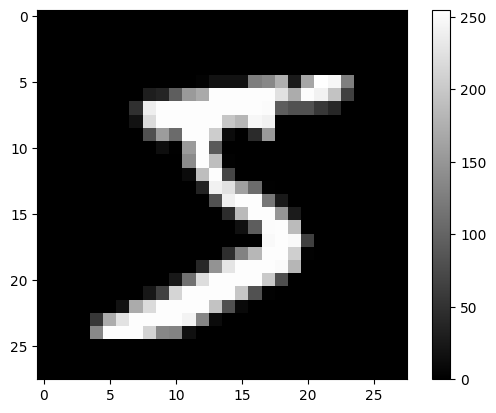

In [ ]:
plt.imshow(train_DS.data[0], cmap = 'gray')
plt.colorbar()

In [ ]:
print(train_DS.targets) #각 사진 정답값 인덱스
print(train_DS.targets.shape) #60000개의 정답

print(test_DS.targets) #각 사진 정답값 인덱스
print(test_DS.targets.shape) #10000개의 정답

tensor([5, 0, 4,  ..., 5, 6, 8])
torch.Size([60000])
tensor([7, 2, 1,  ..., 4, 5, 6])
torch.Size([10000])


# DataLoader 구경

In [ ]:
BATCH_SIZE = 32 #mini 배치 gd
train_DL = torch.utils.data.DataLoader(train_DS, batch_size = BATCH_SIZE, shuffle = True) # 32개 무작위
test_DL = torch.utils.data.DataLoader(test_DS, batch_size = BATCH_SIZE, shuffle = True) # 32개 무작위

In [ ]:
train_DL.dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: /content/drive/MyDrive/Colab Notebooks
    Split: Train
    StandardTransform
Transform: ToTensor()

<class 'torch.Tensor'>
torch.Size([60000, 28, 28])
torch.uint8
--------------------
<class 'torch.Tensor'>
torch.Size([32, 1, 28, 28])
torch.float32
torch.Size([1, 28, 28])
tensor(5)


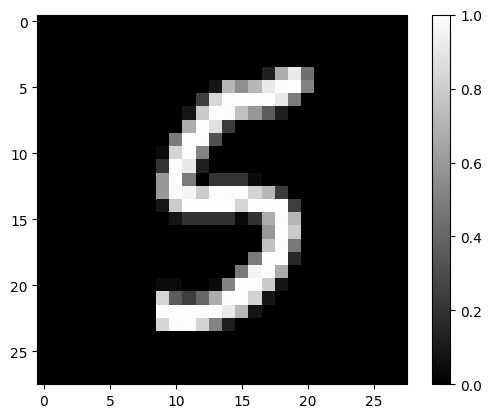

In [ ]:
x_batch, y_batch = next(iter(train_DL)) # 데이터 한 국자 32개 이미지, 32레이블
#ToTensor 역할
# 1. tensor로 바꿈
# 2. 개채행렬로 바꾸고 28x28 -> 1x28x28 행렬 -> 채널x행x열
# 3. 0~1 사이로 바꿈 (int -> float)
print(type(train_DS.data))  # torch.Tensor
print(train_DS.data.shape) # 60000,28,28
print(train_DS.data.dtype) # uint8 정수형
#print(train_DS.data[0])
print("-"*20)
print(type(x_batch)) # torch.Tensor
print(x_batch.shape) # (32,1,28,28) 보통 이미지는 3차원임 RGB 여기선 흑백 한장밖에없으니 1만 추가됨.
print(x_batch.dtype) # float
print(x_batch[0].shape)

plt.imshow(x_batch[0].squeeze(),cmap = 'gray')
plt.colorbar()
print(y_batch[0])

# 본격적으로 model 만들기

In [ ]:
from torch import nn

class MLP(nn.Module):
  def __init__(self):
    super().__init__()
    self.fcs = nn.Sequential(nn.Linear(28*28, 100),
                             nn.ReLU(),
                             nn.Linear(100,10)) #짜피 로스를 ce로 잡으면 자동으로 소프트맥스가 됨

  def forward(self,x):
    x = torch.flatten(x,start_dim = 1)
    x = self.fcs(x)
    return x

In [ ]:
#flatten 평탄화 확인
x_batch, _ =next(iter(train_DL))
print(x_batch.shape)
flat_images = torch.flatten(x_batch)
print(flat_images.shape) # 32x28x28 = 25088
flat_img2 = torch.flatten(x_batch,start_dim = 1)
print(flat_img2.shape) # 1번째 인덱스 부터 flatten 고로 (32,784)

torch.Size([32, 1, 28, 28])
torch.Size([25088])
torch.Size([32, 784])


In [ ]:
model = MLP().to(DEVICE)
print(model)
x_batch,_ = next(iter(train_DL))
print(model(x_batch.to(DEVICE)).shape) #로짓

MLP(
  (fcs): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=10, bias=True)
  )
)
torch.Size([32, 10])


In [ ]:
from torch import optim

# LR = 1e-3 #러닝레이트 0.001
# EPOCH = 5
# criterion = nn.CrossEntropyLoss() # 로스 CE
# optimizer = optim.Adam(model.parameters(), lr=LR) #최적화 기법은 Adam

def Train(model,train_DL,criterion, optimizer, EPOCH):

  loss_history = [] #로스 저장용 리스트
  Not = len(train_DL.dataset) #60000

  model.train() #학습모드
  for ep in range(EPOCH):
    rloss = 0 #running loss
    for x_batch, y_batch in train_DL: #60000개를 32,1,28,28로 꺼내서 학습함 미니배치 학습
      x_batch = x_batch.to(DEVICE) # 32,1,28,28
      y_batch = y_batch.to(DEVICE)
      #inference 추론
      y_hat = model(x_batch) #x_batch 32개를 넣고 y_hat값을 얻음
      #loss
      loss = criterion(y_hat,y_batch) #그 y_hat이랑 y정답값을 이용해 로스 손실 얻음

      #update
      optimizer.zero_grad() #gd 누적 막기위한 초기화
      loss.backward() #역전파 : W에 대한 편미분
      optimizer.step() #업데이트
      #loss accumulation
      loss_b = loss.item() * x_batch.shape[0] #로스랑 32를곱함 왜? CE는 자동으로 평균값을 나타냄 고로 다시 32를 곱해서 전체합을 나타냄
      rloss += loss_b #그것을 rloss에다 누적함 다 누적하면 60000개 대한 로스가 더해짐
    #print loss
    loss_e = rloss/Not # 그걸 60000개로 나눠준다 그러면 전체 EPOCH에 대한 로스 평균이 구해짐
    loss_history += [loss_e]
    print(f"Epoch : {ep + 1}, train_loss : {loss_e:.3f}")
    print("-"*20)
  print(loss_history)


# Cross Eentropy 확인 (왜 모델에 softmax를 안붙였을까?)

In [ ]:
#cross entropy 구하는 방법
import torch.nn.functional as F
#참고로 CE는 1/n(sigma(-(y*log(y^))))

y_hat = torch.randn(3,5) # (3,5)
print(y_hat) #가로 축으로 합이 1이 아님, softmax 통과 전이여서 그럼
y_batch = torch.randint(5,(3,)) # 0~5미만 정수 (3,)모양으로 생성
print(y_batch)
print("-"*20)
#방법 1
loss = F.cross_entropy(y_hat,y_batch) # softmax가 내장
print(loss)
print("-"*20)
# 방법 2
criterion = nn.CrossEntropyLoss()
print(criterion(y_hat,y_batch))
print("-"*20)
#방법 3
soft = nn.Softmax(dim = 1)
y_hat_soft = soft(y_hat)
print(y_hat_soft)
loss = 0
for i, val in enumerate(y_hat_soft): #(3,5) 크기
  print(i,val)
  loss += -torch.log(val[y_batch[i]]) #y_batch의 인덱스 값을 val의 인덱스로 넣음
  #=> 자연스럽게 정답 값이랑 예측값이랑 로스 구함 이게 CE
print(loss/3)

tensor([[ 0.0757,  0.0592,  0.0518,  0.2175, -1.5179],
        [ 0.0703, -0.7146, -1.2892,  0.5681,  0.4504],
        [ 1.5041,  0.3760,  0.1560,  1.0015, -1.6944]])
tensor([0, 0, 2])
--------------------
tensor(1.7283)
--------------------
tensor(1.7283)
--------------------
tensor([[0.2317, 0.2279, 0.2263, 0.2670, 0.0471],
        [0.2075, 0.0946, 0.0533, 0.3413, 0.3034],
        [0.4486, 0.1452, 0.1165, 0.2714, 0.0183]])
0 tensor([0.2317, 0.2279, 0.2263, 0.2670, 0.0471])
1 tensor([0.2075, 0.0946, 0.0533, 0.3413, 0.3034])
2 tensor([0.4486, 0.1452, 0.1165, 0.2714, 0.0183])
tensor(1.7283)


#모델 저장하기 & 불러오기

In [ ]:
save_model_path = "/content/drive/MyDrive/Colab Notebooks/results/MLP.pt"


In [ ]:
# torch.save(model.state_dict(),save_model_path)

In [ ]:
#로드 할때
load_model = MLP().to(DEVICE)
load_model.load_state_dict(torch.load(save_model_path,map_location=DEVICE))

<All keys matched successfully>

#모델 테스트하기

In [ ]:
def Test(model, test_DL):

  model.eval() #eval no_grad는 외우자
  with torch.no_grad():
    rcorrect = 0 #맞춘개수 누적
    for x_batch,y_batch in test_DL:
      x_batch = x_batch.to(DEVICE) #32,1,28,28
      y_batch = y_batch.to(DEVICE) #(32)
      #inference
      y_hat = load_model(x_batch) #y_hat 구하고 (32,10)
      #corrects accumulation
      pred = y_hat.argmax(dim = 1) #32행에서 가로축 원소들 중에 가장 큰값들의 인덱스만 꺼내옴 (32) #1차원
      corrects_b = torch.sum(pred == y_batch).item() # 예측값이랑 정답값이랑 일치하는지
      #print(pred)

      rcorrect += corrects_b #누적시킴

    accuracy_e = rcorrect / len(test_DL.dataset) * 100 # 그러면 (정답수 / 전체 데이터 수)해서 정답률 가능

  print(f"Test accuracy: {rcorrect}/{len(test_DL.dataset)} ({accuracy_e:.1f} %)")

In [ ]:
def Test_plot(model,test_DL):
  model.eval()
  with torch.no_grad():
    x_batch, y_batch = next(iter(test_DL))
    x_batch = x_batch.to(DEVICE)
    y_hat = model(x_batch)
    pred = y_hat.argmax(dim = 1)

  x_batch = x_batch.to('cpu')


  plt.figure(figsize = (8,4))
  for idx in range(6):
    plt.subplot(2,3, idx+1,xticks = [], yticks=[])
    plt.imshow(x_batch[idx].permute(1,2,0).squeeze(), cmap='gray')
    pred_class = test_DL.dataset.classes[pred[idx]]
    true_class = test_DL.dataset.classes[y_batch[idx]]
    plt.title(f"{pred_class} ({true_class})",color = 'g' if pred_class == true_class else "r")

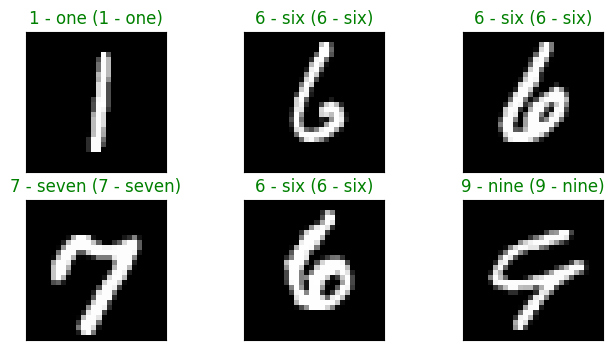

In [ ]:
Test_plot(load_model, test_DL)

#코드 테스트 및 해석용

In [ ]:

# BATCH_SIZE = 32 #mini 배치 gd
# train_DL = torch.utils.data.DataLoader(train_DS, batch_size = BATCH_SIZE, shuffle = True) # 32개 무작위
# test_DL = torch.utils.data.DataLoader(test_DS, batch_size = BATCH_SIZE, shuffle = True) # 32개 무작위
#DS 데이터셋 = 60000,28,28
print(train_DS.data.shape) #60000,28,28
#DL 데이터셋 = 32,1,28,28가 310개 모여있
#


#test_DL 자체는 shape이 없음
#test_DS(dataset)가 shape을 가짐
#DataLoader는 dataset을 “batch 단위로 쪼개서 제공”할 뿐
test_DL = torch.utils.data.DataLoader(test_DS, batch_size = BATCH_SIZE, shuffle = True) # 32개 무작위

for x_batch,y_batch in test_DL:
    #
    x_batch = x_batch.to(DEVICE) # 32,1,28,28형태임
    y_batch = y_batch.to(DEVICE)
    print(x_batch.shape)




torch.Size([60000, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 2

In [ ]:
a = torch.randn(3,10)
print(a)
b = a.argmax(dim = 1)
print(b)

tensor([[-2.3619, -0.3969,  1.4253,  0.7503,  1.3322,  0.0459, -0.9818, -0.8058,
         -1.5005, -1.0765],
        [ 1.0043,  1.2178,  0.2439, -0.0325, -0.2349, -0.0086, -0.0383, -0.7580,
         -0.2706,  0.3221],
        [-0.9300, -0.2365, -1.5458,  0.7217, -1.1805, -0.4459,  0.4602,  0.3725,
          0.4796, -0.2101]])
tensor([2, 1, 3])


In [ ]:
def count_params(model):
  num = sum([p.numel() for p in model.parameters() if p.requires_grad]) #numel = 행렬의 원소의 개수 리턴
  return num


In [ ]:
count_params(load_model) #파라미터가 79510개

79510

In [ ]:
for p in model.parameters():
  print(p.shape)


torch.Size([100, 784])
torch.Size([100])
torch.Size([10, 100])
torch.Size([10])
